In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('remote_work_productivity.csv')

In [9]:
# Handle missing values first
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

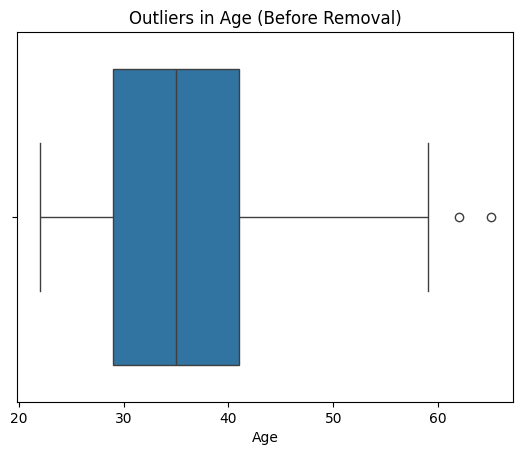

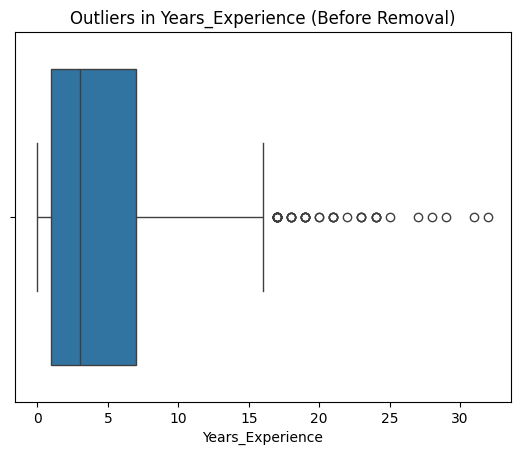

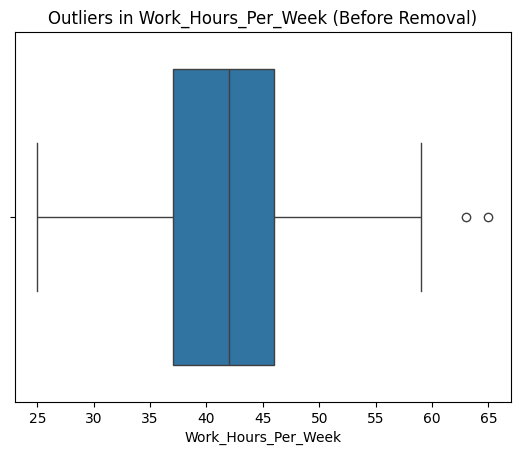

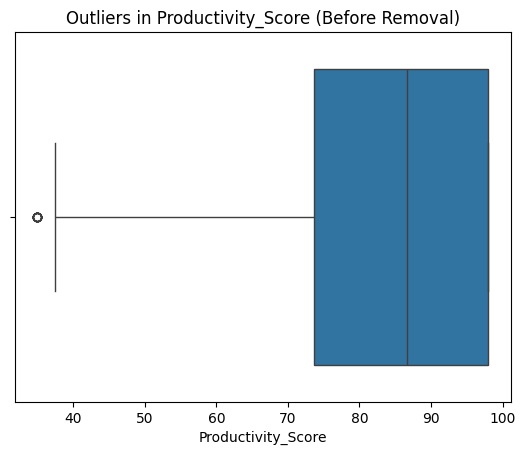

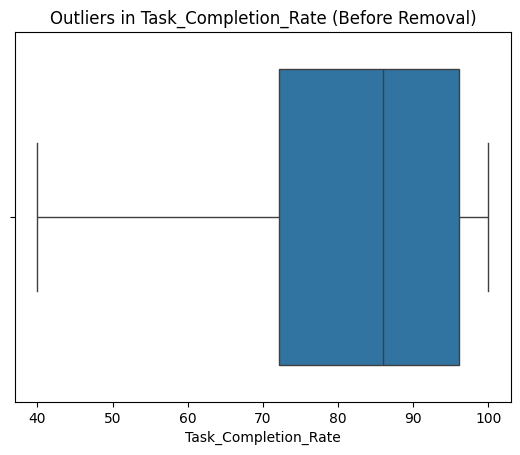

In [10]:
# Pick numerical features for outlier detection
num_cols = ["Age","Years_Experience","Work_Hours_Per_Week","Productivity_Score","Task_Completion_Rate"]

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col} (Before Removal)")
    plt.show()


In [11]:
# Apply IQR method to all numerical features
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_out = remove_outliers(df, num_cols)
print(f"Before: {df.shape[0]} rows, After: {df_out.shape[0]} rows")

Before: 1500 rows, After: 1427 rows
